# 常微分方程式の初期値問題

Scipyを使って、常微分方程式の初期値問題を解いてみる。

「常微分方程式の初期値問題」とは、常微分方程式とその初期値が与えられたときに、それ以降の関数の振る舞いを調べることである。運動方程式など微分方程式で与えられる物理現象は多数あり、その初期の状態は観察することができるので、常微分方程式の初期値問題が解ければ、未来が分かる、と言える。

常微分方程式の初期値問題を扱うのに、今回はじめて**[Scipy](https://scipy.org/)**を使う。Scipyは、Scientific Pythonの略で、数値計算や最適化、信号処理、統計的な関数といった多岐にわたる機能を提供している。これにより、工学、物理学、統計学などの多くの分野での研究や開発が大幅に効率化される。例えば以下のような機能を持つ。

* 線形代数の関数
* 積分や微分方程式のソルバー
* 最適化ツール
* 信号処理ツール
* 統計関数

このように、scipyは様々な科学技術計算の基盤として多用される。また、scipyは「numpy」という数値計算を行うライブラリと密接に関連しており、両方を組み合わせることで高度な計算やデータ分析を効率的に行うことができる。

今回はscipyの常微分方程式ソルバー**odeint**を利用する。odeintは常微分方程式の初期値問題を「数値的に」解く機能（解析的ではなく、数値積分を使って解く機能）を提供する。はじめにscipyライブラリをインストールしよう．

In [1]:
!conda install -y scipy

Channels:
 - conda-forge
Platform: win-64
Solving environment: done

## Package Plan ##

  environment location: C:\Users\konno\miniforge3\envs\JUPYTERLAB_ONLY

  added / updated specs:
    - scipy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libwinpthread-12.0.0.r4.gg4f2fc60ca|      h57928b3_10          36 KB  conda-forge
    llvm-openmp-21.1.3         |       hfa2b4ca_0         340 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         376 KB

The following NEW packages will be INSTALLED:

  icu                conda-forge/win-64::icu-75.1-he0c23c2_0 
  libblas            conda-forge/win-64::libblas-3.9.0-35_h5709861_mkl 
  libcblas           conda-forge/win-64::libcblas-3.9.0-35_h2a3cdd5_mkl 
  libhwloc           conda-forge/win-64::libhwloc-2.12.1-default_h64bd3f2_1002 
  libiconv           conda-

scipyがインストールできたら，目的の *odeint* をインポートする．NumPyとMatplotlibも使うので同時にインポートしよう．

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

## 空気抵抗を受けながら落下する物体の速度

はじめに、解きたい微分方程式を定義する。今回は速度に比例する空気抵抗を受けながら落下する物体の速度を計算しよう。運動方程式より、

$$m\frac{dv}{dt}=mg-kv$$

ここでは下向きを正としており、$kv$が速度に比例する空気抵抗で、$mg$はもちろん重力である。両辺を$m$で割り、

$$\frac{dv}{dt}=g-\frac{kv}{m}$$

この微分方程式の右辺に対応する関数をPythonで定義しよう。

In [4]:
g = 9.81  # m/s^2
m = 1.0
k = 1.0

def dvdt(v, t):
  '''解きたい微分方程式を定義'''
  return g - k*v/m

関数dvdtは実際にはvだけで値が決まる関数でtは関係ないが、一般の1階微分方程式は$\frac{dy}{dx}=f(x,y)$のように右辺に$x$と$y$両方に関係する関数が来る。そのためodeintでも微分方程式の右辺は2つの引数を持つ関数であることを想定しているので、tが引数に入っている。

今回の例では、上記の常微分方程式において初期値を$v=0$とし、$0\leqq t\leqq 10$で解くことを考える。

0.1秒刻みの値を知りたいとしよう。それに対応する配列tを作成する。

In [5]:
t = np.arange(0, 11, 0.1)   # 解きたいのはt=10までだが、ちょっと多めにとっておく。

ここまで用意すれば、ただちに常微分方程式の初期値問題を解くことができる。簡単! 便利!

In [6]:
v = odeint(dvdt, 0, t)

たった1行で、微分方程式の数値解を求めることが出来た．2番目の引数は速度vの初期値で、今回は初速度$v=0$の場合を解いているので0を与えている。

ほんとうに解けているのか確認するため、速度のグラフを描いてみよう。

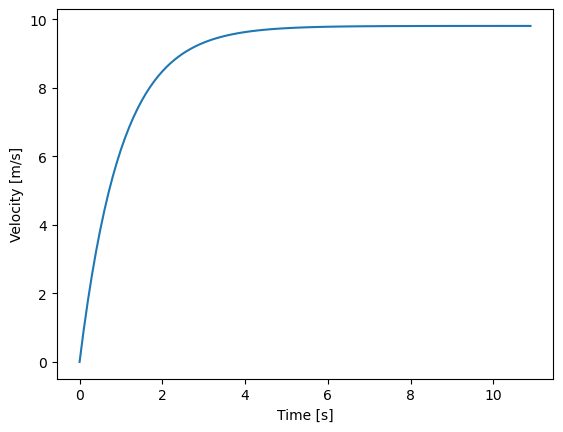

In [7]:
plt.plot(t, v)
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.show()

時間が経過すると空気抵抗により加速が弱まり、やがては一定速度（終速度）に収束することが分かる。

飛翔するボールの軌道を解析するなど、運動方程式を解いて物体の運動を調べたい場合は工学部機械工学科では頻繁にあるが、Scipyを使うと簡単に解けるということを知っておいてほしい。このことを知らないで、物体の運動を調べる方法が分からず悩んでいる卒論生をかつてはよく見た。

## 斜方投射・斜めに投げられた物体の軌道（2次元）

前の例は運動方程式を使って速度を求めたが、位置は求めなかったので、1階の常微分方程式を解けばよかった。こんどは物体の2次元の軌道（位置の変化）を調べることにする。

運動方程式は下記のようになる。（上向きを正とする。）

$$\begin{align} m\frac{d^2 x}{dt^2} &= 0 \\
m\frac{d^2 y}{dt^2} &= -mg \end{align}$$

ごらんの通り、今回は位置を計算する必要があるため、2階の微分方程式を扱う。これを解くにはどうしたらよいか？

2階の微分方程式は、1階微分の変数（今回の場合は、速度）を噛ませることで、連立の1階微分方程式に変換できる。$x$、$y$方向の速度成分をそれぞれ$u$、$v$と書くと、

$$\begin{align} \frac{dx}{dt} &= u \\
m\frac{du}{dt} &= 0 \\
\frac{dy}{dt} &= v \\
m\frac{dv}{dt} &= -mg \end{align}$$

このように2階の微分方程式を1階の微分方程式に書き換えることが出来た．ここで$q=\begin{pmatrix} x \\ u \\ y \\ v \end{pmatrix}$という変数を導入すると、

$$\frac{dq}{dt} = \begin{pmatrix} u \\ 0 \\ v \\ -g \end{pmatrix}$$

と書ける。これに対応する、Pythonの関数を作る。

In [8]:
m = 1.
g = 9.81
def dqdt(q, t):
  '''解きたい微分方程式を定義'''
  u = q[1]
  v = q[3]
  return [u, 0, v, -g]

計算したい時間の範囲と初期値を用意し、それを使ってodeintで常微分方程式の初期値問題を徳。odeintは連立微分方程式も解くことができ、連立方程式なら式の数だけ初期値を用意すればよいだけで、使い方は1変数のときとほぼ変わらない。

In [9]:
t = np.arange(0, 6, 0.1)
q0 = [ 0, 40., 0., 40. ]  # 初期位置(0,0)、初速度(2,2)
q = odeint(dqdt, q0, t)

この計算の結果、qという変数に微分方程式を解いた結果が入る。順番はx, u, y, vなので、1列目と3列目（Numpyの数え方だと、0列目と2列目）にそれぞれx、yが入るので、これらを取り出してグラフにする。

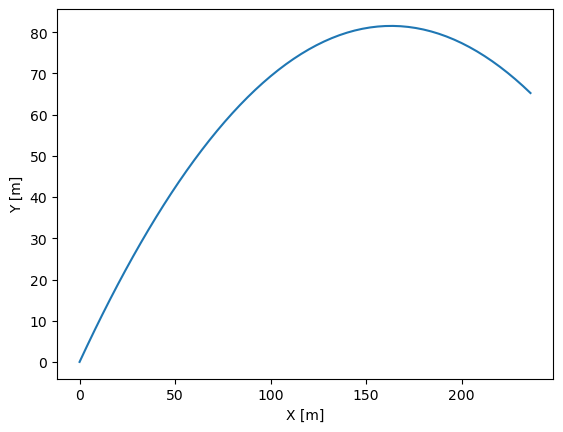

In [10]:
plt.plot(q[:,0], q[:,2])
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.show()

# 課題

## 課題（1）・空気抵抗を受けながら飛翔する物体の軌道

空気抵抗を受けながら飛翔する物体の軌道を計算し、グラフを作成せよ。地上に落ちるまで（$y=0$となるまで）計算すること。

上記のグラフを描画するPythonコードを含めたレポートをJupyterLabノートブックとして作成し，提出せよ．提出方法および提出期限はKU-LMSで指示する．

## 課題（2）・レスラー・アトラクタ（Rössler attractor）

微分方程式

$$\begin{align} \frac{dx}{dt} &= -y-z \\
\frac{dy}{dt} &= x+ay \\
\frac{dz}{dt} &= b+xz-cz \end{align}$$

の$a=0.2$、$b=0.2$、$c=5.7$のときの解はレスラー・アトラクタとしてよく知られている。このアトラクタを3次元のグラフにすると、メビウスの帯のような、リボンを一回ひねって両端を合わせた形になる。レスラー・アトラクタの軌道を表示するJupyterLabノートブックを作成し、提出せよ．なおインタラクティブに操作できるグラフにすること。

提出方法および提出期限はKU-LMSで指示する．

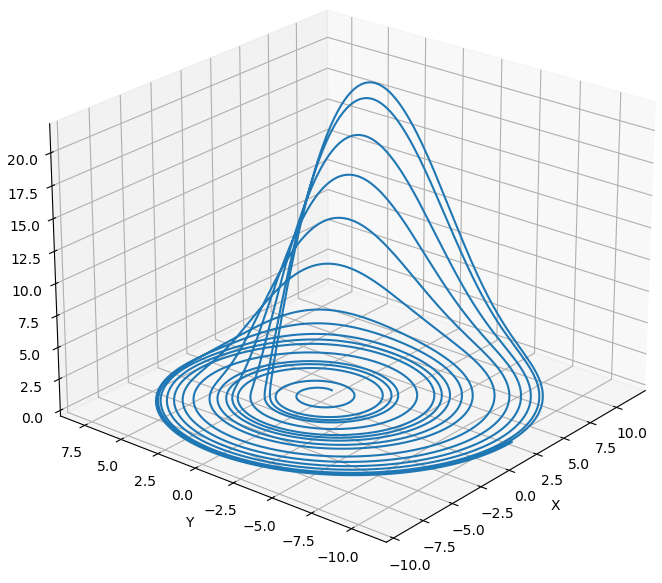

レスラー・アトラクタの例
（この図はインタラクティブに操作できるグラフではないが、課題ではインタラクティブに操作できる図で提出すること。）